# Analysis of Goodread dataset

This is a mock data science analysing Goodreads dataset. The project will go through data munipulation:e.g. removing outliers, cleaning data and slicing columns and rows.

### Dataset
The dataset was retrieved from Kaggle. Link:https://www.kaggle.com/jealousleopard/goodreadsbooks. The dataset contains 10 columns. 
These are:
1) bookID; A unique Identification number for each book.
2) title; The name under which the book was published.
3) authors; Names of the authors of the book. Multiple authors are delimited with -.
4. average_rating; The average rating of the book received in total.
5. isbn;unique number to identify the book, the International Standard Book Number.
6. isbn13;A 13-digit ISBN to identify the book, instead of the standard 11-digit ISBN.
7. language_code; Helps understand what is the primary language of the book. For instance, eng is standard for English.
8. #num_pages;Number of pages the book contains.
9. rating_count; Total number of ratings the book received.
10. text_reviews_count; Total number of written text reviews the book received.

Only 6 out of the 10 columns were used in analysis for the project. These are column no. 3, 4, 7, 8, 9 and 10. 


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
books= pd.read_csv('books.csv')

In [3]:
#All column names
for col in books.columns:
    print (col)

bookID
title
authors
average_rating
isbn
isbn13
language_code
# num_pages
ratings_count
text_reviews_count


In [4]:
# Removing the unique ID columns 
books_1=books.drop(columns=['isbn','isbn13'])

In [5]:
books_1.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
language_code          object
# num_pages             int64
ratings_count           int64
text_reviews_count      int64
dtype: object

 ## Descriptive statistic of the Data

Checking the distibution of the data for #num_pages

C:\Users\Rimna\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


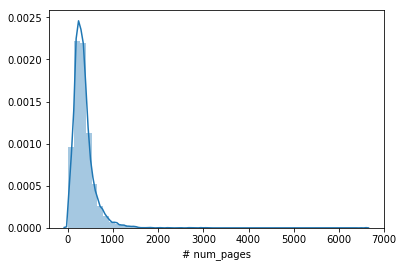

In [6]:
num_page= books_1['# num_pages']
dist_num_page=sns.distplot(num_page)

The data seems to the skewed to the right (positive skewness). However, there seems be some outliers. To check for outlier, a boxplot was used. Any points outside the outplot are considered outliers 

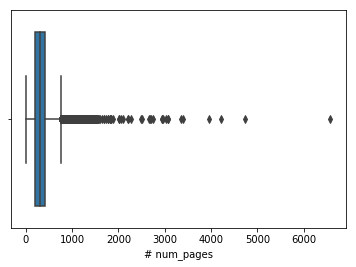

In [7]:
# To check for outliers use a boxplot
# The outliers will points outside the boxplot 
boxplot=sns.boxplot(num_page)

To remove the outliers we will use the 1.5 IQR rule where any data points outside the lowerbounds and upperbounds are removed. 

#### Equation:
- IQR (inter Quartile range): Q3 (greater than the last 25% of the data) - Q1 (greater than the first 25% of the data) 
- lowerbound: Q1 - (1.5*IQR)
- upperbound: Q3 -(1.5*IQR)

In [17]:
from scipy import stats
import numpy as np

In [9]:
# created a function that identifies the upper and lower ranges
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [10]:
lowerbounds,upperbounds=outlier_treatment(books_1['# num_pages'])
# books_1r is the dataset without outliers
books_1r=books_1.drop(books_1[(books_1['# num_pages'] > upperbounds)
                              | (books_1['# num_pages'] < lowerbounds)].index , inplace=False)
                                          

[Text(0, 0.5, 'KDE (kernal density Estimate)'), Text(0.5, 0, 'Number of page')]

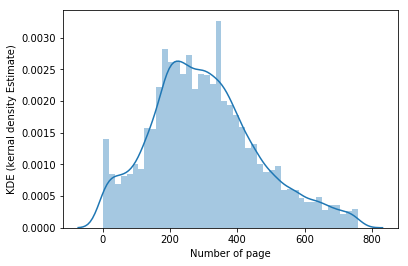

In [11]:
dist_plot_numpage2= sns.distplot(books_1r['# num_pages'])
dist_plot_numpage2.set(xlabel="Number of page", ylabel='KDE (kernal density Estimate)')

The distribution is still slightly skewed to the right but appears to be normally distributed without the outliers. However, just to sure a normality test will be conducted.


In [12]:
# Alpha/2
alpha=0.025
#Calculating P-value
stats,p=stats.normaltest(books_1r['# num_pages'])

#testing null hypothesis
if p<alpha:
    print('Reject Null hypothesis')
else:
    print('Can not reject Null hypothesis')


Reject Null hypothesis


We reject the null hypothesis, meaning the data is not normally distributed. Let us the compare the distribution of number of page per books and review count. Taking into consideration the law of least effort, books with a high number of pages will have lower number of review counts.

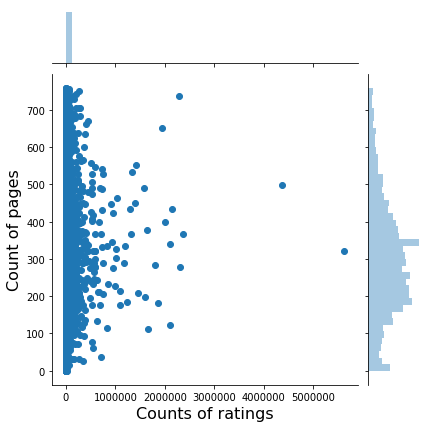

In [13]:
rate_vs_page=sns.jointplot(x='ratings_count',y='# num_pages', data=books_1r)
rate_vs_page.set_axis_labels('Counts of ratings', 'Count of pages', fontsize=16)

In [14]:
winner=books_1r.loc[books_1r['ratings_count']>4000000]
print(winner[['authors', 'ratings_count']])

                          authors  ratings_count
1542              Stephenie Meyer        4367341
13348  J.K. Rowling-Mary GrandPré        5629932


The writers will more than 4 million reviews are Stephenie Meyer who is mostly known for her Twight books serie and J.K. Rowling-Mary Granpre; the writer of Harry Potter. 

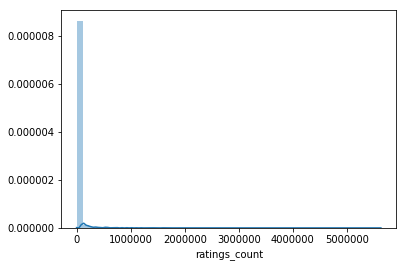

In [15]:
rate_dist=sns.distplot(books_1r['ratings_count'])

There is no need for farther testing as it seems that rating are rare in general but there are obvious outliers. 

C:\Users\Rimna\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


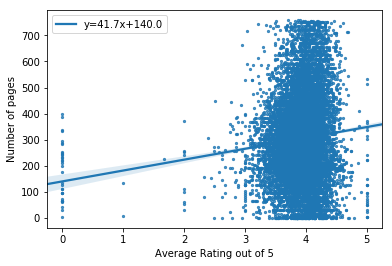

In [18]:
slope, intercept, r_value, p_value, std_err = stats.linregress(books_1r['average_rating'],
                                                               books_1r['# num_pages'])

graph_cor2=sns.regplot(x='average_rating',y='# num_pages',data=books_1r,
                     scatter_kws={'s':5},
                     line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
graph_cor2.set(xlabel="Average Rating out of 5",
               ylabel='Number of pages')
graph_cor2.legend()


# Focusing on Authors

We will now focus on specific authors and see how they compare with others. 

In [19]:
# Looking for my favourite author, Neil Gaiman 

books_1.loc[books_1['authors']=='Neil Gaiman']

,bookID,title,authors,average_rating,language_code,# num_pages,ratings_count,text_reviews_count
8044,16788,Fragile Things: Short Fictions and Wonders,Neil Gaiman,4.01,eng,360,43210,2431
8149,2744,Anansi Boys,Neil Gaiman,4.02,eng,387,153485,6986
8734,16790,Smoke and Mirrors: Short Fiction and Illusions,Neil Gaiman,4.05,eng,365,50702,1819
8737,17061,Coraline,Neil Gaiman,4.05,eng,162,377685,12114
8738,17062,Coraline,Neil Gaiman,4.05,eng,163,376,24
9318,16793,Stardust,Neil Gaiman,4.08,eng,248,264799,11040
9814,4404,American Gods,Neil Gaiman,4.11,eng,635,1207,167
9815,4407,American Gods (American Gods #1),Neil Gaiman,4.11,eng,635,382229,15978
9986,47692,American Gods,Neil Gaiman,4.11,spa,477,58,6
11007,14497,Neverwhere (London Below #1),Neil Gaiman,4.18,eng,370,323601,14372


In [24]:
# how many books has Neil Gaiman publihed
neil_rating= books.loc[books_1['authors']=='Neil Gaiman']
neil_rating=neil_rating.sort_values(by='average_rating', ascending=False)
len(neil_rating['authors'])

13

[Text(0, 0.5, 'Avarage Rating out of 5'), Text(0.5, 0, 'Title')]

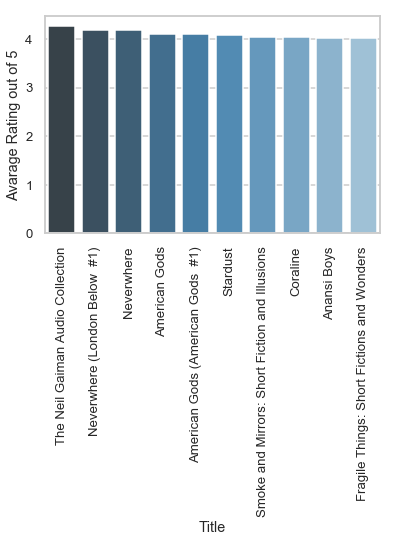

In [25]:
# Looking to see the rating to books by Neil 
sns.set(style="whitegrid", context="talk", font_scale=0.8)
neil_top=sns.barplot(x='title', y='average_rating', data=neil_rating, palette='Blues_d')
neil_top.set_xticklabels(neil_top.get_xticklabels(),rotation=90)
neil_top.set(xlabel="Title", ylabel='Avarage Rating out of 5')
# American God has the forth highest rating, although the firt two 'books'
# should not be counted. As one of them is a repeat and the other one is a
# collection of audio ? 

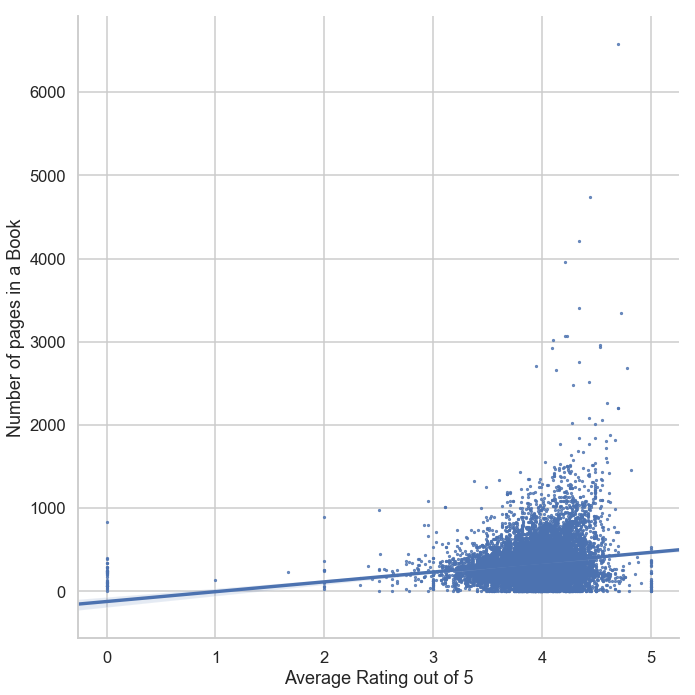

In [26]:
# Is there correlation between number pages and rating
sns.set(style="whitegrid", context="talk", font_scale=1)
graph_cor=sns.lmplot(x='average_rating',y='# num_pages',data=books_1, 
                     palette='muted', scatter_kws={'s':5},
                     height=10, aspect=1)
graph_cor.set(xlabel="Average Rating out of 5", ylabel='Number of pages in a Book')

[Text(0, 0.5, 'Mean of number of pages'), Text(0.5, 0, 'Authors')]

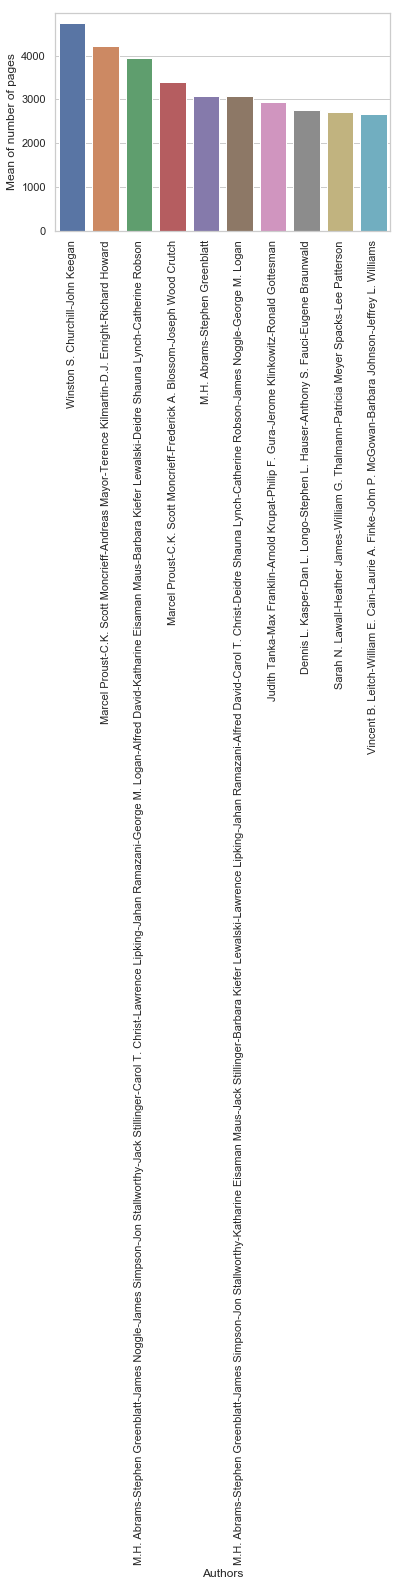

In [28]:
# checking which author/authors have written most amount of pages on average
sns.set(style="whitegrid", font_scale=1)
authors= books_1.groupby(['authors']).mean().reset_index()
authors=authors.sort_values(by='# num_pages', ascending=False)
graph_authors_score= sns.barplot(x='authors', y='# num_pages', data=authors.head(10), )
graph_authors_score.set_xticklabels(graph_authors_score.get_xticklabels(),rotation=90)
graph_authors_score.set(xlabel="Authors", ylabel='Mean of number of pages')

In [29]:
import numpy as np

In [30]:
neil_rating.shape 
# the first number represents row and second number represents columns

(13, 10)

In [31]:
neil_rating['negative_score']=neil_rating.apply(lambda x: 5-x['average_rating'], axis=1 )

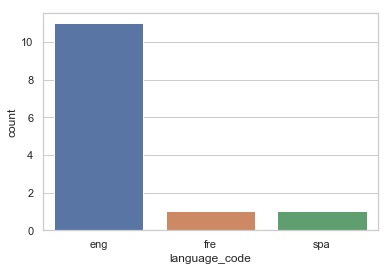

In [32]:
langauge_count= sns.countplot(x="language_code", data=neil_rating)

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Language Code')]

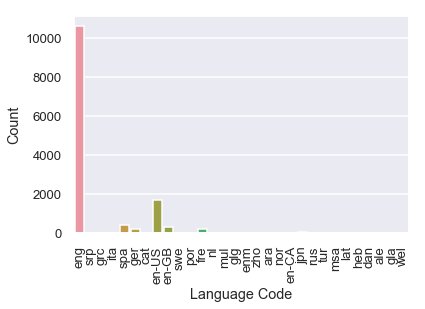

In [33]:
#checkign how many books were written in english
sns.set(context='talk', font_scale=0.8)
language_count=sns.countplot(x='language_code', data=books_1)
language_count.set_xticklabels(language_count.get_xticklabels(),
                               rotation=90)
language_count.set(xlabel='Language Code', ylabel='Count')

In [35]:
# Checking the count of language with english but including american english
books_12=books_1.set_index('language_code')
books_12=books_12.drop('eng', axis=0)
books_12=books_12.reset_index()
books_12

,language_code,bookID,title,authors,average_rating,# num_pages,ratings_count,text_reviews_count
0,srp,10200,Venac sonetnih venaca; Puževa srma,Dobrica Erić,0.00,222,0,0
1,grc,27416,Mythographi Graeci 1: Apollodori Bibliotheca ...,Apollodorus-Richard Wagner,0.00,335,0,0
2,ita,47295,Il genio e l'alienista: La strana visita di Lo...,Paolo Mazzarello,0.00,94,0,0
3,spa,47551,La habitacion oscura,Sofía Irene Cardona,0.00,64,0,0
4,ger,10010,Max Frisch Homo faber,Reinhard Meurer,2.00,109,0,0
5,ger,14423,Lektürehilfen Lord Of The Flies. (Lernmaterial...,W. Meitcke,2.00,99,2,0
6,cat,23155,Self Service,Quim Monzó-Biel Mesquida,2.00,256,1,0
7,en-US,33993,Citizen Girl,Emma McLaughlin-Nicola Kraus,2.40,305,5362,576
8,en-US,45516,The Die Broke Financial Problem Solver,Stephen M. Pollan-Mark LeVine,2.50,272,3,0
9,spa,45686,Vero y el fantasma de Canterville,Carlos Puerto-Jordi Vila Delclos,2.50,121,2,0


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Language Code')]

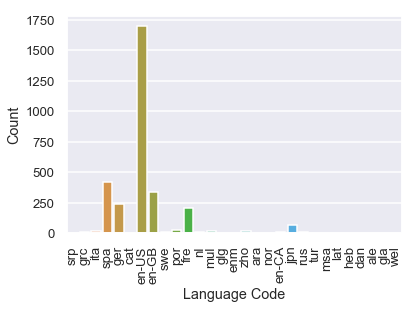

In [36]:
sns.set(context='talk', font_scale=0.8)
language_count2=sns.countplot(x='language_code', data=books_12)
language_count2.set_xticklabels(language_count2.get_xticklabels(),
                               rotation=90)
language_count2.set(xlabel='Language Code', ylabel='Count')

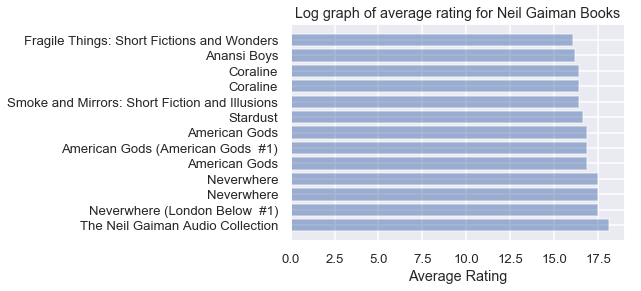

In [49]:
# Making a log graph of average rating for Neil Gaiman
neil_rate=np.array(neil_rating)
neil_rate[:,3].astype(float)
n_100=neil_rate[:,3]**2
# setting the variables 
books_nam = neil_rate[:,1].tolist()
y_pos = np.arange(len(objects))
ratings = n_100.tolist()
# creating the plot 
plt.barh(y_pos, ratings, align='center', alpha=0.5)
plt.yticks(y_pos, books_nam)
plt.xlabel('Average Rating')
plt.title('Log graph of average rating for Neil Gaiman Books')

plt.show()

### Comparing Neil Gaiman to Stephen King

([<matplotlib.patches.Wedge at 0x2c9d790c470>,
 [Text(0.7293748344478347, 0.8234150538302016, 'Neil Gaiman'),
  Text(-0.7293747573541504, -0.8234151221191984, 'Stephen King')],
 [Text(0.39784081878972793, 0.44913548390738267, '26.9%'),
  Text(-0.39784077673862744, -0.4491355211559264, '73.1%')])

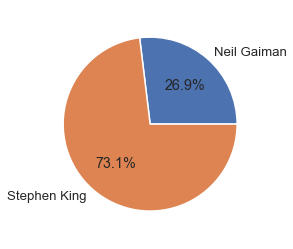

In [50]:
# Which has received the most amount of reviews
neil_gaimen=books_1.loc[books_1['authors']=='Neil Gaiman']
stephen_king= books_1.loc[books_1['authors']=='Stephen King']

neil_and_king=pd.concat([neil_gaimen, stephen_king])

neil_and_king_review_count= neil_and_king.groupby(['authors']).sum().reset_index()

neil_and_king_review_count=np.array(neil_and_king_review_count)

#setting the labels and the count of rating
author_label=neil_and_king_review_count[:, 0]
rating_count= neil_and_king_review_count[:,4].astype(int)

plt.pie(rating_count, labels=author_label,autopct='%1.1f%%')

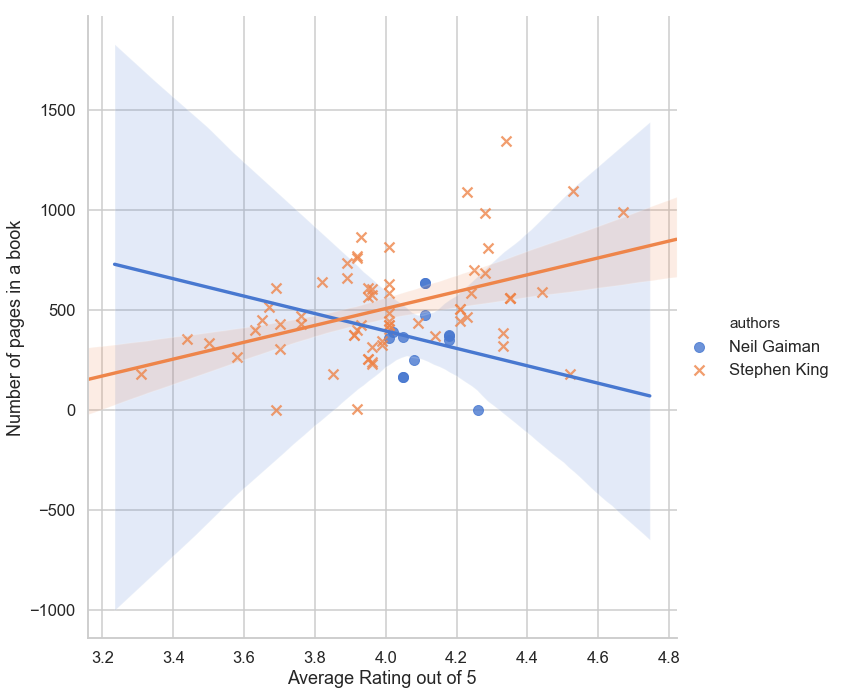

In [51]:
sns.set(style="whitegrid", context="talk", font_scale=1)
graph_cor_NK=sns.lmplot(x='average_rating',y='# num_pages',data=neil_and_king, 
                     palette='muted', scatter_kws={'s':100}, hue='authors',markers=['o','x'] ,
                     height=10, aspect=1)
graph_cor_NK.set(xlabel="Average Rating out of 5", ylabel='Number of pages in a book')

In [54]:
# creating a function to check hypothesis
def hypothesis_check(data,column_name):
    # Alpha/2
    alpha=0.025
    #Calculating P-value
    stat,p_v=stats.normaltest(data[column_name])
    #testing null hypothesis
    if p_v<alpha:
        print('Reject Null hypothesis')
    else:
        print('Can not reject Null hypothesis')

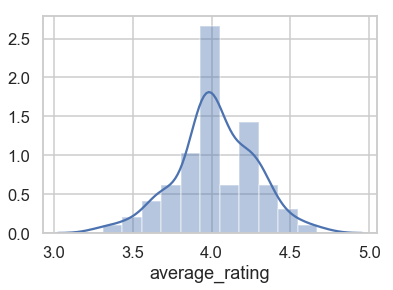

In [53]:
#Checking the distribution rating for neil and stephen 

dist_plot2=sns.distplot(neil_and_king['average_rating'])

In [55]:
hypothesis_check(neil_and_king, 'average_rating')

Can not reject Null hypothesis


We will use independent t-test to check for if there is a difference in the average rating of the two authors 

In [57]:
king_group= neil_and_king.loc[neil_and_king['authors']=='Stephen King']
neil_group=neil_and_king.loc[neil_and_king['authors']=='Neil Gaiman']
# independent t-test
stats,p_v=stats.ttest_ind(king_group['average_rating'], neil_group['average_rating'])
# Testing
if p_v<alpha:
    print('Reject Null hypothesis')
else:
    print('Can not reject Null hypothesis')


Can not reject Null hypothesis


We can not reject the Null hypothesis, meaning that there is no difference in the distribution of average rating between Neil Gaiman and Stephen King. 